In [2]:
%load_ext autoreload
%autoreload 2

# Demo
##### This is a demo for testing and training U_TITAN.

In [3]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import time
from U_TITAN import *
from tools import *


###  Parameters

In [4]:

# Hyperparameters

T = 10000
K = 10
N = 10

input_dim = N * N * K + K * K * N
N_updates_W = 10
N_updates_C = 1

num_layers = 60

learning_rate = 0.01
dataset_size = 1000
num_epochs = 30
train_batch_size = 128

## Model parameters

gamma_c = 1
gamma_w = 0.99
eps = 1e-12
nu = 0.5
zeta = 1e-3 


learning_mode = 'no_inertial'
cases = 'easy cases'


## 1- Train a model


### 1.1- Training conditions

In [5]:
training_mode = 'end-to-end'
training_name = f'K{K}_N{N}_num_layers{num_layers}_{cases}'
#learning_mode = 'coefficients'

path_testset       = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/test/'+cases
path_trainset      = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/train/'+cases
path_valset        = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/val/'+cases
path_save          = os.path.join('SSP_Trainings_2', training_name)
folders            = [path_testset,path_trainset,path_valset, path_save]


if not os.path.exists(path_save):
    os.makedirs(path_save)

print('--------------------------------------------------------------------------------------------------------------------------------')
print('Training : %s'%(training_name))
print('Training mode: %s'%(training_mode))
print('Trained model will be saved in %s.'%(path_save))
print('--------------------------------------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------------------------------------
Training : K10_N10_num_layers60_easy cases
Training mode: end-to-end
Trained model will be saved in SSP_Trainings_2/K10_N10_num_layers60_easy cases.
--------------------------------------------------------------------------------------------------------------------------------


In [23]:
network = U_TITAN(folders, training_mode, T, K, N, input_dim, learning_rate, N_updates_W, N_updates_C, num_epochs, train_batch_size, dataset_size, num_layers, gamma_c, gamma_w, eps, nu, zeta, learning_mode)
network.train()

=================== End-to-end training ===================
Epoch 1/30, training loss: 0.2260
Epoch 1/30, validation loss: 0.2208
Epoch 2/30, training loss: 0.2032
Epoch 2/30, validation loss: 0.1993
Epoch 3/30, training loss: 0.1832
Epoch 3/30, validation loss: 0.1762
Epoch 4/30, training loss: 0.1561
Epoch 4/30, validation loss: 0.1619
Epoch 5/30, training loss: 0.1380
Epoch 5/30, validation loss: 0.1278
Epoch 6/30, training loss: 0.1137
Epoch 6/30, validation loss: 0.1020
Epoch 7/30, training loss: 0.0936
Epoch 7/30, validation loss: 0.0904
Epoch 8/30, training loss: 0.0778
Epoch 8/30, validation loss: 0.0746
Epoch 9/30, training loss: 0.0605
Epoch 9/30, validation loss: 0.0489
Epoch 10/30, training loss: 0.0503
Epoch 10/30, validation loss: 0.0326
Epoch 11/30, training loss: 0.0412
Epoch 11/30, validation loss: 0.0316
Epoch 12/30, training loss: 0.0366
Epoch 12/30, validation loss: 0.0289
Epoch 13/30, training loss: 0.0313
Epoch 13/30, validation loss: 0.0242
Epoch 14/30, training 

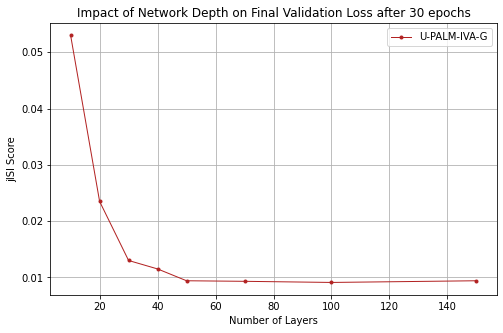

In [24]:
list_num_layers = [10, 20, 30, 40, 50, 70, 100, 150]
final_val_loss = [0.053, 0.0235, 0.013, 0.0115, 0.0094, 0.0093, 0.0091, 0.0094]
# Create the figure
plt.figure(figsize=(8, 5))
plt.plot(list_num_layers, final_val_loss, linestyle='-', linewidth=1, marker='o',markersize = 3,color='firebrick') 

# Labels and title
plt.xlabel("Number of Layers")
plt.ylabel("jISI Score")
plt.title("Impact of Network Depth on Final Validation Loss after 30 epochs")
plt.grid(True)
plt.legend(['U-PALM-IVA-G'], loc='upper right')

# Display the plot
plt.show()


In [1]:
# Train and Validation Loss

isi_train = network.isi_train
isi_val = network.isi_val

epochs = range(1, len(isi_train) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, isi_train, color='black', linestyle='--', linewidth=1, label='Training Loss')  # Black solid line
plt.plot(epochs, isi_val, color='firebrick', linestyle='--', linewidth=1, label='Validation Loss')  # Gray dashed line
plt.title('(K, N) = (%d,%d)'%(K, N))
plt.xlabel('Epochs')
plt.grid(True)
plt.ylabel('jISI Score')
plt.legend()
plt.show()

NameError: name 'network' is not defined

In [86]:
for name, param in network.model.named_parameters():
    if param.grad is None:
        print(f"Parameter '{name}' has no gradient")
    else:
        pass
        print(f"Parameter '{name}' gradient mean: {param.grad.mean().item()}") 
        print(f"Parameter '{name}' value: {param.mean().item()}")

Parameter 'Layers.0.alpha' gradient mean: -0.0006586923263967037
Parameter 'Layers.0.alpha' value: 0.5413248538970947
Parameter 'Layers.0.gamma_w' gradient mean: nan
Parameter 'Layers.0.gamma_w' value: -1.2890000343322754
Parameter 'Layers.0.gamma_c' gradient mean: 0.001359183108434081
Parameter 'Layers.0.gamma_c' value: -1.2890000343322754
Parameter 'Layers.1.alpha' gradient mean: -0.001108149066567421
Parameter 'Layers.1.alpha' value: 0.5413248538970947
Parameter 'Layers.1.gamma_w' gradient mean: -0.006687692366540432
Parameter 'Layers.1.gamma_w' value: -1.2890000343322754
Parameter 'Layers.1.gamma_c' gradient mean: 0.002292270539328456
Parameter 'Layers.1.gamma_c' value: -1.2890000343322754
Parameter 'Layers.2.alpha' gradient mean: -0.0007511373842135072
Parameter 'Layers.2.alpha' value: 0.5413248538970947
Parameter 'Layers.2.gamma_w' gradient mean: -0.006688495632261038
Parameter 'Layers.2.gamma_w' value: -1.2890000343322754
Parameter 'Layers.2.gamma_c' gradient mean: 0.00157259847

In [103]:
# Stocker les valeurs de alpha, gamma_w et gamma_c pour chaque couche
alpha_values = []
gamma_w_values = []
gamma_c_values = []
beta_w_values = []
beta_c_values = []

def softplus(x):
    return np.log(1 + np.exp(x))

def tanh(x):
    return np.tanh(x)

for name, param in network.named_parameters():
    if 'alpha' in name:
        alpha_values.append(softplus(param.clone().detach().cpu().numpy()))
    elif 'gamma_w' in name:
        gamma_w_values.append(0.3 + 5 * tanh(param.clone().detach().cpu().numpy() + 1))
    elif 'gamma_c' in name:
        gamma_c_values.append(0.3 + 5 * tanh(param.clone().detach().cpu().numpy() + 1))

        

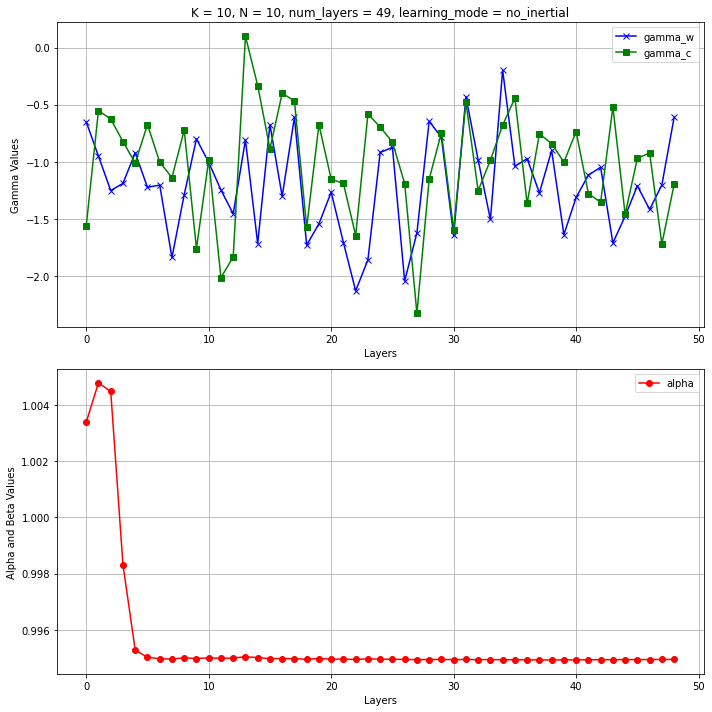

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir en numpy arrays pour la visualisation
alpha_values = np.array(alpha_values)[:-1]  # Remove last element
gamma_w_values = np.array(gamma_w_values)[:-1]  # Remove last element
gamma_c_values = np.array(gamma_c_values)[:-1]  # Remove last element
beta_w_values = np.array(beta_w_values)[:-1]  # Remove last element
beta_c_values = np.array(beta_c_values)[:-1]  # Remove last element

# Nombre de couches (excluding the last layer)
layers = np.arange(len(alpha_values))

# Création du graphique avec 2 sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Graphique 1: gamma_w et gamma_c
axs[0].plot(layers, gamma_w_values, label='gamma_w', color='blue', marker='x')
axs[0].plot(layers, gamma_c_values, label='gamma_c', color='green', marker='s')
axs[0].set_xlabel('Layers')
axs[0].set_ylabel('Gamma Values')
axs[0].set_title('K = %d, N = %d, num_layers = %d, learning_mode = %s'%(K, N, num_layers - 1, learning_mode))
axs[0].legend()
axs[0].grid(True)

# Graphique 2: alpha, beta_w, et beta_c
axs[1].plot(layers, alpha_values, label='alpha', color='red', marker='o')
axs[1].set_xlabel('Layers')
axs[1].set_ylabel('Alpha and Beta Values')
axs[1].legend()
axs[1].grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()



## 1- Test saved models
### 1.1- Test conditions

In [10]:
num_layers = 20

In [7]:
#training_model_to_test = f'learning_alpha_K{K}_N{N}_num_layers{num_layers}_learning_mode_{learning_mode}'
training_model_to_test = f'K{K}_N{N}_num_layers{num_layers}_{cases}'

path_testset       = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/test/'+cases
path_trainset      = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/train/'+cases
path_valset        = '/workspace/TITAN/Unrolled-TITAN/TITAN_Unrolled/Datasets/val/'+cases
path_save          = os.path.join('SSP_Trainings_2', training_model_to_test)
folders            = [path_testset,path_trainset,path_valset, path_save]



### 1.4- Load a model

In [11]:
mode = 'test'
#learning_mode = 'coefficients'
test_batch_size = 1

network = U_TITAN(folders, mode, T, K, N, input_dim, learning_rate, N_updates_W, N_updates_C, num_epochs, test_batch_size, dataset_size, num_layers, gamma_c, gamma_w, eps, nu, zeta, learning_mode)
path_layers = os.path.join(path_save,'best_val.pth')
network.model.load_state_dict(torch.load(path_layers))

print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)
print('Loaded U_TITAN layers from %s.'%(path_layers))
print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)


--------------------------------------------------------------------------------------------------------------------------------
Loaded U_TITAN layers from SSP_Trainings_2/K10_N10_num_layers60_easy cases/best_val.pth.
--------------------------------------------------------------------------------------------------------------------------------


### 1.5- Test a model

In [12]:
print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)
print('Testing model %s ...'%(path_save),flush=True)
network.test()
print('Dataset: %s'%(cases))
print('Average time per data: %.6f seconds'%(network.test_mean_time_per_data),flush=True)
print('--------------------------------------------------------------------------------------------------------------------------------',flush=True)

--------------------------------------------------------------------------------------------------------------------------------
Testing model SSP_Trainings_2/K10_N10_num_layers60_easy cases ...
  0%|          | 0/100 [00:00<?, ?it/s]



ISI Scores:  [0.6990708708763123, 0.6920759677886963, 0.6806548237800598, 0.6643069982528687, 0.640069842338562, 0.5946996808052063, 0.542527973651886, 0.49343839287757874, 0.4473661184310913, 0.39927539229393005, 0.35283952951431274, 0.31991493701934814, 0.2896069586277008, 0.25359466671943665, 0.223525270819664, 0.1970820128917694, 0.17202572524547577, 0.14969253540039062, 0.1190556138753891, 0.0986829549074173, 0.08497850596904755, 0.06917298585176468, 0.05682642385363579, 0.04640977829694748, 0.037187013775110245, 0.030274799093604088, 0.024637090042233467, 0.02059277519583702, 0.01743164099752903, 0.015059877187013626, 0.01289250049740076, 0.011620686389505863, 0.010490098036825657, 0.0097610829398036, 0.009189963340759277, 0.008877047337591648, 0.008564659394323826, 0.008371653966605663, 0.008208638988435268, 0.008085658773779869, 0.007990446873009205, 0.00792041327804327, 0.007865802384912968, 0.007826952263712883, 0.007796520367264748, 0.007775748148560524, 0.0077609224244952

In [31]:
print(network.model.isi_scores)

[0.6769681787490844, 0.6011255085468292, 0.5104059597849846, 0.4191752481460571, 0.35500443235039714, 0.2812130418419838, 0.24898573413491248, 0.20999110609292984, 0.18553005769848824, 0.16064471792429685, 0.14844777889549732, 0.12907946150749922, 0.11189909489825368, 0.09654816968366503, 0.06821500810794533, 0.04930376892909408, 0.03997250385582447, 0.03379017420113087, 0.026753894770517945, 0.023477080417796968, 0.019538282784633338, 0.017476606871932743, 0.014684220114722847, 0.013062311965040863, 0.011528832856565713, 0.01063965518027544, 0.01017629052978009, 0.009623734392225742, 0.009354610601440072, 0.009142929795198143, 0.008934557670727372, 0.008819730263203382, 0.008726220186799765, 0.008592345342040062, 0.008534707734361291, 0.008509503859095276, 0.00848695653025061, 0.008476050170138479, 0.008465498867444694, 0.008457723236642779, 0.008454215484671295, 0.008453107425011694, 0.00845226458273828, 0.008451416906900704, 0.008451056322082878, 0.008450679406523704, 0.008450464601

In [13]:
network.model.isi_scores

[0.6904204094409943,
 0.6803141856193542,
 0.6658664846420288,
 0.6428225648403167,
 0.6167121243476867,
 0.5819625031948089,
 0.5395120140910149,
 0.4986585056781769,
 0.4584421968460083,
 0.41766228556632995,
 0.38157530456781386,
 0.3509088668227196,
 0.3225815050303936,
 0.29712713226675985,
 0.2735362862050533,
 0.2501167614758015,
 0.22630648121237754,
 0.2062725143134594,
 0.17873727306723594,
 0.15879810899496077,
 0.1438755437731743,
 0.12595285959541797,
 0.11113015871495008,
 0.0976721440628171,
 0.08463040856644512,
 0.07395233849063515,
 0.06433737670071422,
 0.05668294437229633,
 0.0499138099513948,
 0.04417489074170589,
 0.037985316338017584,
 0.033696742346510294,
 0.029273050017654897,
 0.025974428225308658,
 0.022912001889199018,
 0.021035559996962546,
 0.018863033149391414,
 0.017353854510001838,
 0.01596866856329143,
 0.014853701894171536,
 0.01385403954423964,
 0.013020563777536154,
 0.012316776691004633,
 0.01175012044608593,
 0.01123894052579999,
 0.0108178357034

In [73]:
with_inertial_isi_scores = with_inertial_isi_scores[:50]


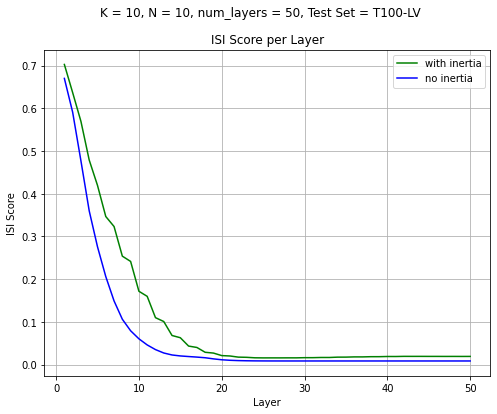

In [76]:
import matplotlib.pyplot as plt
import torch



# Convert ISI scores to numpy for plotting
#isi_scores_numpy = [score for score in isi_scores]  # Extract scalar from tensor

# Number of layers (X-axis)
layers = list(range(1, len(with_inertial_isi_scores) + 1))

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(layers, with_inertial_isi_scores, linestyle='-', color='g', label='with inertia')
plt.plot(layers, no_inertial_isi_scores, linestyle='-', color='b', label='no inertia')

# Add labels and title
plt.xlabel('Layer')
plt.ylabel('ISI Score')
plt.title('ISI Score per Layer')
plt.suptitle('K = %d, N = %d, num_layers = %d, Test Set = T100-LV'%(K, N, num_layers))

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


### 1.6- Plot learned parameters

In [14]:
# Stocker les valeurs des paramètres appris
alpha_values = []
gamma_w_values = []
gamma_c_values = []
beta_w_values = []
beta_c_values = []


def softplus(x):
    return np.log(1 + np.exp(x))

def relu(x):
    return np.maximum(0, x)

# Collecter les paramètres pour chaque couche
for name, param in network.named_parameters():
    if 'alpha' in name:
        alpha = softplus(param.clone().detach().cpu().numpy())
        alpha_values.append(alpha)
    elif 'gamma_w' in name:
        gamma_w = 0.3 + 5 * (np.tanh(param.clone().detach().cpu().numpy()) + 1)  # Appliquer la transformation
        gamma_w_values.append(gamma_w)
    elif 'gamma_c' in name:
        gamma_c = 0.3 + 5 * (np.tanh(param.clone().detach().cpu().numpy()) + 1)  # Appliquer la transformation
        gamma_c_values.append(gamma_c)







In [33]:
num_layers

50

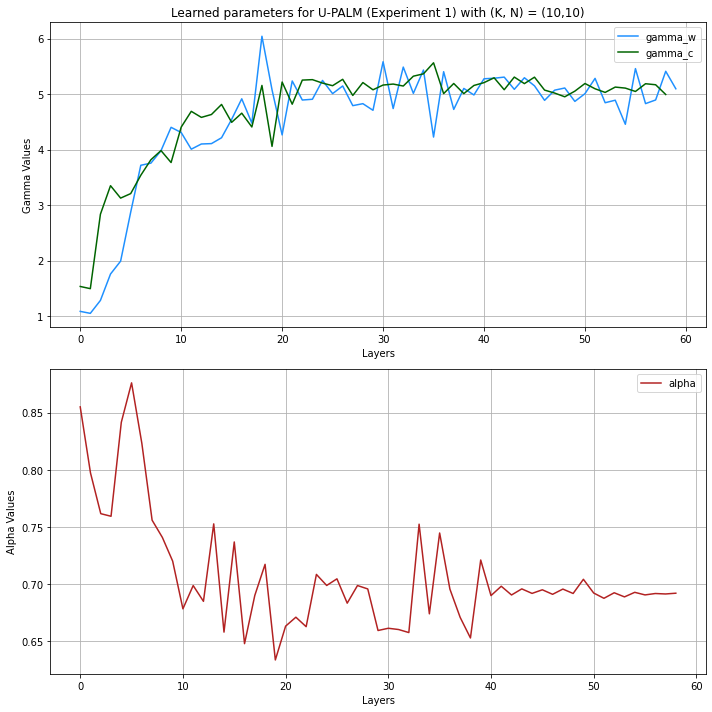

In [32]:
import matplotlib.pyplot as plt
import numpy as np



# Nombre de couches (excluding the last layer)
layers = np.arange(len(alpha_values))

# Création du graphique avec 2 sous-graphiques
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Graphique 1: gamma_w et gamma_c
axs[0].plot(layers, gamma_w_values, label='gamma_w', color='dodgerblue')
axs[0].plot(layers[:-1], gamma_c_values[:-1], label='gamma_c', color='darkgreen')
axs[0].set_xlabel('Layers')
axs[0].set_ylabel('Gamma Values')
axs[0].set_title('Learned parameters for U-PALM (Experiment 1) with (K, N) = (%d,%d)'%(K, N))
axs[0].legend()
axs[0].grid(True)

# Graphique 2: alpha, beta_w, et beta_c
axs[1].plot(layers[:-1], alpha_values[:-1], label='alpha', color='firebrick')
axs[1].set_xlabel('Layers')
axs[1].set_ylabel('Alpha Values')
axs[1].legend()
axs[1].grid(True)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()



In [9]:
beta_w_values

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

### 1.7- Make table